In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("C://Users//Ananthram Vasu//Downloads//indian_liver_patient.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.describe

<bound method NDFrame.describe of      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
zerocount = (df == 0).sum()
zerocount

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [11]:
#Filling missing values with Most Frequent Value (Mode)
df.fillna(df.mode().iloc[0], inplace=True)

In [12]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<Axes: >

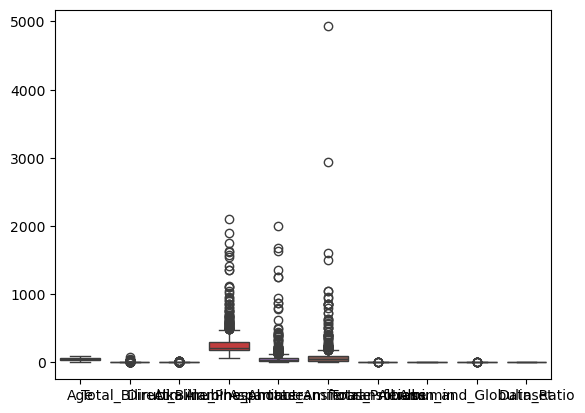

In [13]:
#now let us see for outliers
sns.boxplot(data = df)

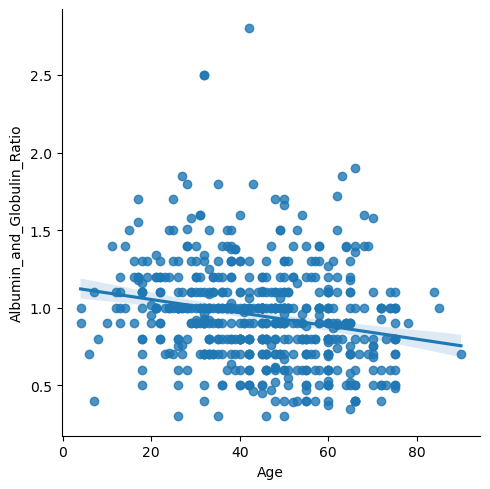

In [15]:
sns.lmplot(data=df,x='Age',y='Albumin_and_Globulin_Ratio')

In [22]:
#creating a new dataframe only with numeric dataset to detect for outliers
df_numeric = df.drop(columns=['Gender'])

In [21]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  583 non-null    float64
 9   Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


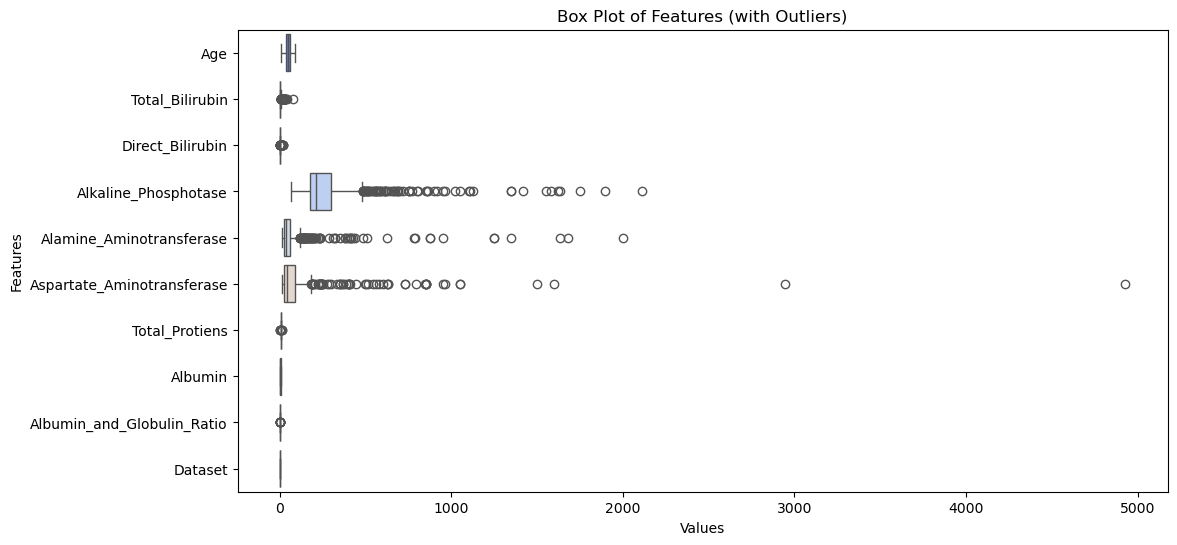

Age                            0
Total_Bilirubin               84
Direct_Bilirubin              81
Alkaline_Phosphotase          69
Alamine_Aminotransferase      73
Aspartate_Aminotransferase    66
Total_Protiens                 8
Albumin                        0
Albumin_and_Globulin_Ratio    10
Dataset                        0
dtype: int64

In [24]:
# Detect outliers using IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Outlier conditions (values outside 1.5*IQR range)
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))

# Count of outliers per column
outlier_counts = outliers.sum()

# Visualize using an improved box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric, orient="h", palette="coolwarm", showfliers=True)
plt.title("Box Plot of Features (with Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

# Display count of outliers per feature
outlier_counts

In [25]:
# Treating Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping (Winsorization)
df_numeric= df_numeric.copy()
df_numeric = df_numeric.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Verify if outliers are capped
outliers_after = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
outliers_after

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

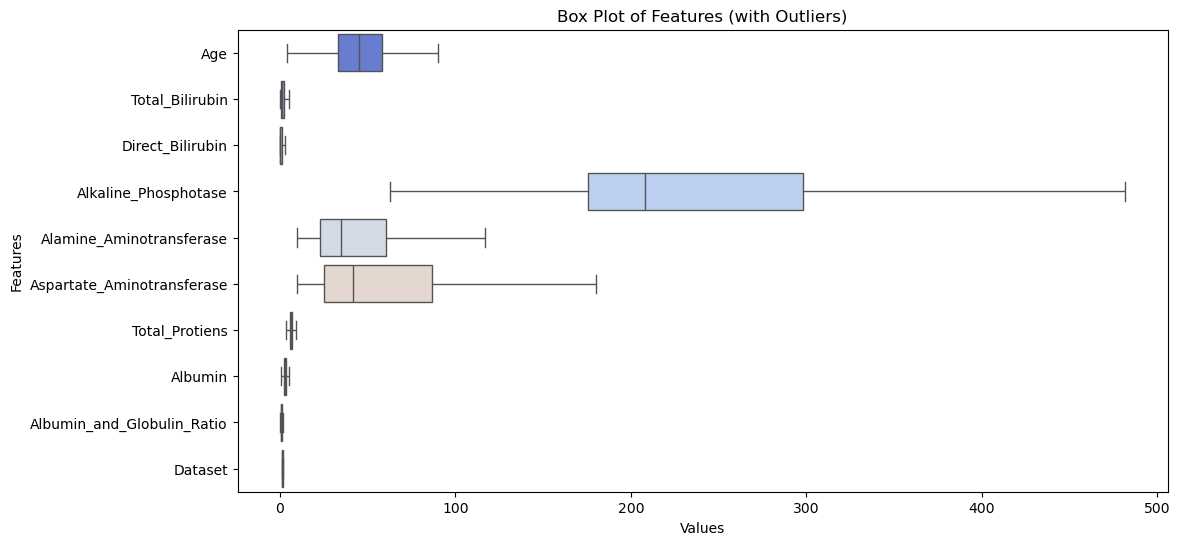

In [28]:
# Visualizing after outlier treatment box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric, orient="h", palette="coolwarm", showfliers=True)
plt.title("Box Plot of Features (with Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

<Axes: xlabel='Dataset', ylabel='Age'>

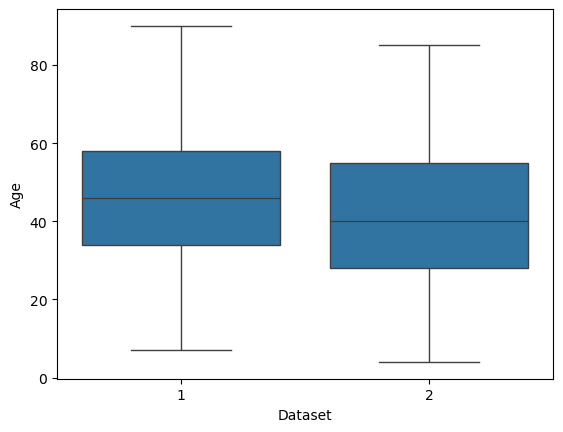

In [52]:
sns.boxplot(data=df_numeric,x="Dataset",y="Age")

In [30]:
col = 'Gender'
print(df[col].value_counts())

Gender
Male      441
Female    142
Name: count, dtype: int64


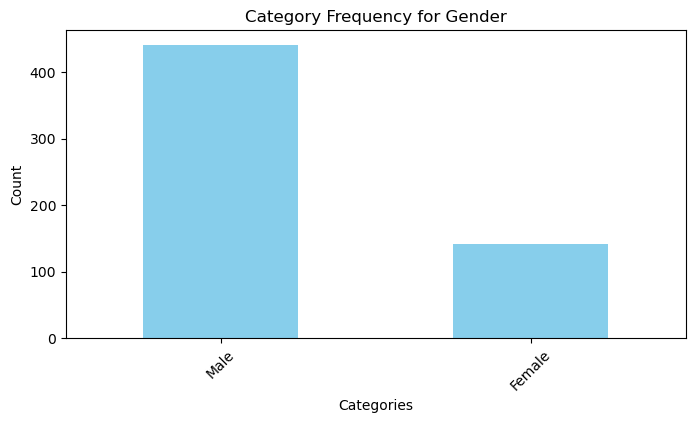

In [32]:
df[col].value_counts().plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title(f"Category Frequency for {col}")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [41]:
del df_final

In [42]:
df_final = pd.concat([df_numeric, df["Gender"]], axis=1)
df_final

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender
0,65,0.7,0.10,187.00,16.0,18,6.8,3.3,0.90,1,Female
1,62,5.3,2.95,481.75,64.0,100,7.5,3.2,0.74,1,Male
2,62,5.3,2.95,481.75,60.0,68,7.0,3.3,0.89,1,Male
3,58,1.0,0.40,182.00,14.0,20,6.8,3.4,1.00,1,Male
4,72,3.9,2.00,195.00,27.0,59,7.3,2.4,0.40,1,Male
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.10,481.75,20.0,34,5.9,1.6,0.37,2,Male
579,40,0.6,0.10,98.00,35.0,31,6.0,3.2,1.10,1,Male
580,52,0.8,0.20,245.00,48.0,49,6.4,3.2,1.00,1,Male
581,31,1.3,0.50,184.00,29.0,32,6.8,3.4,1.00,1,Male


In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the Gender column
df_final["Gender"] = le.fit_transform(df_final["Gender"])

# Check encoding
print(df_final["Gender"].value_counts())
# 0 for femals and 1 for male

Gender
1    441
0    142
Name: count, dtype: int64


In [44]:
df_final

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender
0,65,0.7,0.10,187.00,16.0,18,6.8,3.3,0.90,1,0
1,62,5.3,2.95,481.75,64.0,100,7.5,3.2,0.74,1,1
2,62,5.3,2.95,481.75,60.0,68,7.0,3.3,0.89,1,1
3,58,1.0,0.40,182.00,14.0,20,6.8,3.4,1.00,1,1
4,72,3.9,2.00,195.00,27.0,59,7.3,2.4,0.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.10,481.75,20.0,34,5.9,1.6,0.37,2,1
579,40,0.6,0.10,98.00,35.0,31,6.0,3.2,1.10,1,1
580,52,0.8,0.20,245.00,48.0,49,6.4,3.2,1.00,1,1
581,31,1.3,0.50,184.00,29.0,32,6.8,3.4,1.00,1,1


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
X=df_final[['Age','Total_Bilirubin','Direct_Bilirubin',	'Alkaline_Phosphotase',	'Alamine_Aminotransferase',	'Aspartate_Aminotransferase',	'Total_Protiens',	'Albumin',	'Albumin_and_Globulin_Ratio', 'Gender']]
y=df_final["Dataset"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
lsr = LogisticRegression()
lsr.fit(X_train,y_train)

A:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
lsr.score(X_train,y_train)

0.7345537757437071

In [64]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
rfc.score(X_train,y_train)

1.0

In [66]:
knnc = KNeighborsClassifier()
knnc.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
knnc.score(X_train,y_train)

0.7780320366132724

In [68]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [69]:
gbc.score(X_train,y_train)

0.9450800915331807

In [72]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
dtc.score(X_train,y_train)

1.0

In [74]:
#By analysing this we get 100% accuracy with both Decision Tree Classifier and Random forest Classifier 
#Since we care about our accuracy we prefere Random forest.

In [82]:
prediction = rfc.predict([[]])

In [83]:
prediction = ["Liver Disease Consult with a Doctor" if val == 1 else "No liver Disease Predicted" for val in prediction]
for i, pred in enumerate(prediction[:30]):  # Print first 20 predictions
    print(f"Sample {i+1}: {pred}")

Sample 1: Liver Disease Consult with a Doctor
Sample 2: Liver Disease Consult with a Doctor
Sample 3: Liver Disease Consult with a Doctor
Sample 4: Liver Disease Consult with a Doctor
Sample 5: No liver Disease Predicted
Sample 6: Liver Disease Consult with a Doctor
Sample 7: No liver Disease Predicted
Sample 8: Liver Disease Consult with a Doctor
Sample 9: Liver Disease Consult with a Doctor
Sample 10: Liver Disease Consult with a Doctor
Sample 11: Liver Disease Consult with a Doctor
Sample 12: Liver Disease Consult with a Doctor
Sample 13: Liver Disease Consult with a Doctor
Sample 14: Liver Disease Consult with a Doctor
Sample 15: Liver Disease Consult with a Doctor
Sample 16: Liver Disease Consult with a Doctor
Sample 17: Liver Disease Consult with a Doctor
Sample 18: Liver Disease Consult with a Doctor
Sample 19: Liver Disease Consult with a Doctor
Sample 20: Liver Disease Consult with a Doctor
Sample 21: Liver Disease Consult with a Doctor
Sample 22: No liver Disease Predicted
Sa

In [84]:
import joblib

joblib.dump(prediction, 'IndianLiverDiseaseNotebook.pkl')

['IndianLiverDiseaseNotebook.pkl']